## Finding Happiness 

Greetings to all viewers. The purpose of this Jupyter Notebook is to attempt to find which measures correlate the most with a country's overall happiness rating. This rating of "happiness score" was determined by grouping together  https://www.kaggle.com/unsdsn/world-happiness.

Because the Happiness score is an aggregate of the other scores found in this study, my goal was to pull from other data sources to find a various amount of attributes that correlate with this Happiness score. 

In [218]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [219]:
happy2019 = pd.read_csv('2019.csv')

In [220]:
happy2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [221]:
happy2019.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


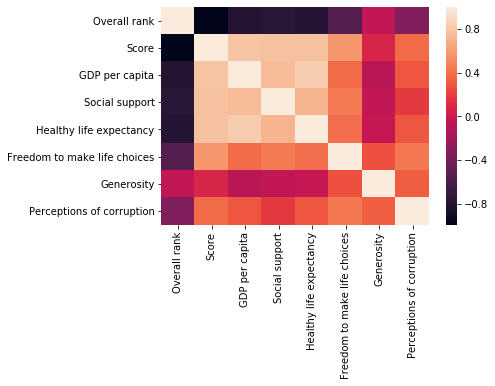

In [222]:
sns.heatmap(happy2019.corr())

In [223]:
happy2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [224]:
happy2019[['Overall rank', 'Score' , 'Country or region']].head(20)

,Overall rank,Score,Country or region
0,1,7.769,Finland
1,2,7.600,Denmark
2,3,7.554,Norway
3,4,7.494,Iceland
4,5,7.488,Netherlands
5,6,7.480,Switzerland
6,7,7.343,Sweden
7,8,7.307,New Zealand
8,9,7.278,Canada
9,10,7.246,Austria


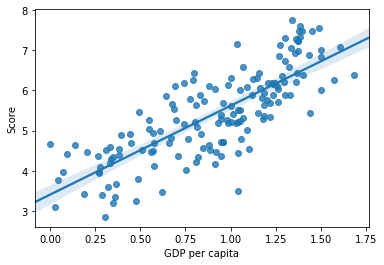

In [225]:
sns.regplot(x = 'GDP per capita', y='Score', data = happy2019)

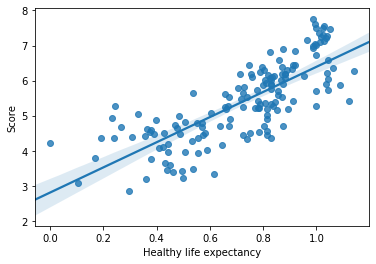

In [226]:
sns.regplot(x ='Healthy life expectancy' ,y='Score', data = happy2019)

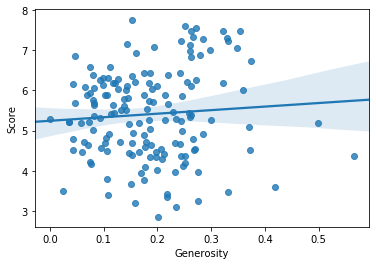

In [227]:
sns.regplot(x ='Generosity' ,y='Score', data = happy2019)

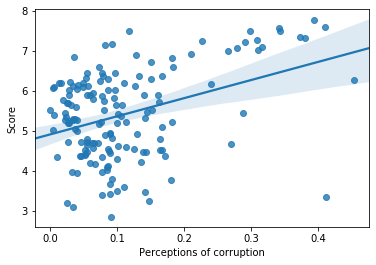

In [228]:
sns.regplot(x ='Perceptions of corruption' ,y='Score', data = happy2019)

In [229]:
ginidf = pd.read_csv('API_SI.POV.GINI_DS2_en_csv_v2_887268.csv', skiprows=4)

In [230]:
ginidf.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.3,NaN,NaN
3,Albania,ALB,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,29.0,NaN,34.6,32.9,33.7,33.2,NaN,NaN,NaN
4,Andorra,AND,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [231]:
len(ginidf.index)

264

In [232]:
len(happy2019.index)

156

In [233]:
ginidf.set_index('Country Name',inplace=True)

In [234]:
ginidf.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,AGO,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.3,NaN,NaN
Albania,ALB,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,29.0,NaN,34.6,32.9,33.7,33.2,NaN,NaN,NaN
Andorra,AND,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [235]:
ginidf.fillna(0,inplace = True)

In [236]:
#I want to transform my data so that I am only given the latest Gini coefficient as wella s the year that it was last updated.
#To do this I will create two new columns in the data frame. 
### One for each of the two above things that I stated I was lookiing for. 
# I honestly only want relatively recent data so if there is no Gini coefficient after 2009, then we'll just give them nans.
# I also have then (non) problem of having more gini index countries than ones with happiness data.
# Seeing as happiness is the thing that I care about the most I'm only going to pay attnetion to the countries in that data set.
latestyear = []
latestdata = []

for country, series in ginidf.iterrows():
    latest = False
    for year in range(-1,-11 ,-1):
        if series[year] > 0 and latest == False:
            latest = series[year]
            latestyear.append(ginidf.iloc[ :,year].name)
            latestdata.append(latest)
            
    if latest == False:
        latestyear.append(0)
        latestdata.append(0)
    print(country,ginidf.iloc[ :,year].name, latest)    
            
    
    

    # Select column contents by column name using [] operator
 #  if ginidf[column]columnSeriesObj = empDfObj[column]
  # print('Colunm Name : ', column)
   #print('Column Contents : ', columnSeriesObj.values)

Aruba 2011 False
Afghanistan 2011 False
Angola 2011 51.3
Albania 2011 33.2
Andorra 2011 False
Arab World 2011 False
United Arab Emirates 2011 32.5
Argentina 2011 41.4
Armenia 2011 34.4
American Samoa 2011 False
Antigua and Barbuda 2011 False
Australia 2011 34.4
Austria 2011 29.7
Azerbaijan 2011 False
Burundi 2011 38.6
Belgium 2011 27.4
Benin 2011 47.8
Burkina Faso 2011 35.3
Bangladesh 2011 32.4
Bulgaria 2011 40.4
Bahrain 2011 False
Bahamas, The 2011 False
Bosnia and Herzegovina 2011 33.0
Belarus 2011 25.2
Belize 2011 False
Bermuda 2011 False
Bolivia 2011 42.2
Brazil 2011 53.9
Barbados 2011 False
Brunei Darussalam 2011 False
Bhutan 2011 37.4
Botswana 2011 53.3
Central African Republic 2011 False
Canada 2011 33.8
Central Europe and the Baltics 2011 False
Switzerland 2011 32.7
Channel Islands 2011 False
Chile 2011 44.4
China 2011 38.5
Cote d'Ivoire 2011 41.5
Cameroon 2011 46.6
Congo, Dem. Rep. 2011 42.1
Congo, Rep. 2011 48.9
Colombia 2011 50.4
Comoros 2011 45.3
Cabo Verde 2011 42.4
Costa 

In [237]:
ginidf[ginidf['2019']>0]

#For some reason this data doesn't have any data for 2019 despite having a column for it.

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
Country Name,,,,,,,,,,,,,,,,,,,,,


In [238]:
ginidf['latest_gini_year'] = latestyear
ginidf['latest_gini_data'] = latestdata

In [239]:
ginidf

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64,latest_gini_year,latest_gini_data
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,GINI index (World Bank estimate),SI.POV.GINI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
Afghanistan,AFG,GINI index (World Bank estimate),SI.POV.GINI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
Angola,AGO,GINI index (World Bank estimate),SI.POV.GINI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,51.3,0.0,0.0,2018,51.3
Albania,ALB,GINI index (World Bank estimate),SI.POV.GINI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,34.6,32.9,33.7,33.2,0.0,0.0,0.0,2017,33.2
Andorra,AND,GINI index (World Bank estimate),SI.POV.GINI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
Arab World,ARB,GINI index (World Bank estimate),SI.POV.GINI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
United Arab Emirates,ARE,GINI index (World Bank estimate),SI.POV.GINI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,32.5,0.0,0.0,0.0,0.0,0.0,0.0,2014,32.5
Argentina,ARG,GINI index (World Bank estimate),SI.POV.GINI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,41.0,41.7,0.0,42.0,41.2,41.4,0.0,0.0,2018,41.4
Armenia,ARM,GINI index (World Bank estimate),SI.POV.GINI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30.6,31.5,32.4,32.5,33.6,34.4,0.0,0.0,2018,34.4


In [240]:
#Now that I have gathered the data that I want, I will now try to combine the gini data along with the happiness data. 
happy2019.rename(columns= {'Country or region': 'Country Name'}, inplace = True)
happy2019.set_index('Country Name',inplace=True)

In [241]:
freedomDF = pd.read_csv('FreedomScores.csv')

In [242]:
freedomDF.head() 

,Country/Territory,Region,C/T,Edition,Status,PR rating,CL rating,A1,A2,A3,...,F3,F4,F,G1,G2,G3,G4,G,CL,Total
0,Abkhazia,Eurasia,t,2020,PF,5,5,2,2,1,...,1,1,4,1,1,2,1,5,23,40
1,Afghanistan,Asia,c,2020,NF,5,6,1,1,1,...,0,1,2,0,1,0,1,2,14,27
2,Albania,Europe,c,2020,PF,3,3,3,3,2,...,2,3,9,3,2,2,2,9,40,67
3,Algeria,MENA,c,2020,NF,6,5,1,1,1,...,2,2,6,2,2,2,1,7,24,34
4,Andorra,Europe,c,2020,F,1,1,4,4,4,...,4,3,15,4,4,3,4,15,55,94


In [243]:
freedomDF.columns

Index(['Country/Territory', 'Region', 'C/T', 'Edition', 'Status', 'PR rating',
       'CL rating', 'A1', 'A2', 'A3', 'A', 'B1', 'B2', 'B3', 'B4', 'B', 'C1',
       'C2', 'C3', 'C', 'Add Q', 'Add A', 'PR', 'D1', 'D2', 'D3', 'D4', 'D',
       'E1', 'E2', 'E3', 'E', 'F1', 'F2', 'F3', 'F4', 'F', 'G1', 'G2', 'G3',
       'G4', 'G', 'CL', 'Total'],
      dtype='object')

In [244]:
freedomDF = freedomDF[['Country/Territory','Region','Status','PR','CL']]

In [245]:
freedomDF.rename(columns={'PR':'Political Rights Rating',
                          'CL':'Civil Liberties Rating',
                          'Country/Territory':'Country Name'}, 
                 inplace=True)

In [246]:
freedomDF.set_index('Country Name',inplace=True)

In [247]:
homicides = pd.read_csv('Copy of download.csv')

In [248]:
homicides.head()

,Location,Year,Age,Sex,Cause of death or injury,Measure,Value,Lower bound,Upper bound
0,Mozambique,2017.0,All ages,Both,Interpersonal violence,"Deaths per 100,000",6.343194,3.937707,7.962520
1,Mauritius,2017.0,All ages,Both,Interpersonal violence,"Deaths per 100,000",2.555378,2.311405,2.813295
2,Malawi,2017.0,All ages,Both,Interpersonal violence,"Deaths per 100,000",1.702387,0.964270,4.860037
3,Rwanda,2017.0,All ages,Both,Interpersonal violence,"Deaths per 100,000",2.947404,1.898101,4.065592
4,Somalia,2017.0,All ages,Both,Interpersonal violence,"Deaths per 100,000",8.302062,2.936126,12.609610


In [249]:
homicides.set_index('Location',inplace =True)

In [250]:
homicides.drop(['Year','Age','Sex','Cause of death or injury', 'Measure','Lower bound', 'Upper bound'],axis =1 ,inplace = True)

In [251]:
homicides.rename(columns={'Value':'Homicides per 100,000'}, 
                 inplace=True)

In [252]:
homicides.head()

,"Homicides per 100,000"
Location,
Mozambique,6.343194
Mauritius,2.555378
Malawi,1.702387
Rwanda,2.947404
Somalia,8.302062


In [253]:
finaldata = happy2019.join(ginidf)

In [254]:
finaldata = finaldata.join(freedomDF)

In [255]:
finaldata = finaldata.join(homicides)

In [256]:
finaldata.drop(map(str,list(range(1960,2020))+['Unnamed: 64']), axis=1 , inplace = True)

In [257]:
finaldata 

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country Code,Indicator Name,Indicator Code,latest_gini_year,latest_gini_data,Region,Status,Political Rights Rating,Civil Liberties Rating,Total,"Homicides per 100,000"
Country Name,,,,,,,,,,,,,,,,,,,
Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,FIN,GINI index (World Bank estimate),SI.POV.GINI,2017,27.4,Europe,F,40.0,60.0,100.0,1.581320
Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,DNK,GINI index (World Bank estimate),SI.POV.GINI,2017,28.7,Europe,F,40.0,57.0,97.0,0.807711
Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,NOR,GINI index (World Bank estimate),SI.POV.GINI,2017,27.0,Europe,F,40.0,60.0,100.0,0.729275
Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,ISL,GINI index (World Bank estimate),SI.POV.GINI,2015,26.8,Europe,F,37.0,57.0,94.0,0.728002
Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,NLD,GINI index (World Bank estimate),SI.POV.GINI,2017,28.5,Europe,F,40.0,59.0,99.0,0.857513
Switzerland,6,7.480,1.452,1.526,1.052,0.572,0.263,0.343,CHE,GINI index (World Bank estimate),SI.POV.GINI,2017,32.7,Europe,F,39.0,57.0,96.0,0.613309
Sweden,7,7.343,1.387,1.487,1.009,0.574,0.267,0.373,SWE,GINI index (World Bank estimate),SI.POV.GINI,2017,28.8,Europe,F,40.0,60.0,100.0,1.199427
New Zealand,8,7.307,1.303,1.557,1.026,0.585,0.330,0.380,NZL,GINI index (World Bank estimate),SI.POV.GINI,0,0.0,Asia,F,40.0,57.0,97.0,1.340484
Canada,9,7.278,1.365,1.505,1.039,0.584,0.285,0.308,CAN,GINI index (World Bank estimate),SI.POV.GINI,2013,33.8,Americas,F,40.0,58.0,98.0,1.512904


In [258]:
finaldata = finaldata[finaldata['latest_gini_data']>0]

In [259]:
finaldata.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,latest_gini_data,Political Rights Rating,Civil Liberties Rating,Total,"Homicides per 100,000"
Overall rank,1.000000,-0.991107,-0.811972,-0.780235,-0.811691,-0.504799,-0.031816,-0.372057,0.300782,-0.567678,-0.643266,-0.618208,-0.001016
Score,-0.991107,1.000000,0.809747,0.775750,0.801724,0.512641,0.073570,0.417631,-0.336654,0.563111,0.642848,0.615936,-0.042980
GDP per capita,-0.811972,0.809747,1.000000,0.814159,0.864106,0.386529,-0.081135,0.307603,-0.383113,0.582436,0.652734,0.630159,-0.173860
Social support,-0.780235,0.775750,0.814159,1.000000,0.738606,0.392125,-0.028021,0.215608,-0.279760,0.541868,0.590946,0.576998,0.021668
Healthy life expectancy,-0.811691,0.801724,0.864106,0.738606,1.000000,0.387800,-0.070887,0.290010,-0.423156,0.551635,0.620444,0.598100,-0.190545
Freedom to make life choices,-0.504799,0.512641,0.386529,0.392125,0.387800,1.000000,0.262346,0.453072,0.020745,0.303658,0.339083,0.327843,0.028490
Generosity,-0.031816,0.073570,-0.081135,-0.028021,-0.070887,0.262346,1.000000,0.307344,-0.130823,-0.021543,-0.057009,-0.041971,-0.167340
Perceptions of corruption,-0.372057,0.417631,0.307603,0.215608,0.290010,0.453072,0.307344,1.000000,-0.241554,0.204801,0.261565,0.239779,-0.191823
latest_gini_data,0.300782,-0.336654,-0.383113,-0.279760,-0.423156,0.020745,-0.130823,-0.241554,1.000000,-0.152524,-0.184013,-0.172449,0.498947
Political Rights Rating,-0.567678,0.563111,0.582436,0.541868,0.551635,0.303658,-0.021543,0.204801,-0.152524,1.000000,0.946682,0.983123,-0.042919


In [260]:
finaldata.std(axis = 0)

Overall rank                    45.897614
Score                            1.123700
GDP per capita                   0.379713
Social support                   0.279235
Healthy life expectancy          0.222203
Freedom to make life choices     0.135596
Generosity                       0.099569
Perceptions of corruption        0.093878
latest_gini_data                 7.746825
Political Rights Rating         11.493649
Civil Liberties Rating          14.648884
Total                           25.796858
Homicides per 100,000            9.738297
dtype: float64

In [261]:
finaldata['Overall rank'].nunique()

116

In [262]:
finaldata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, Finland to Tanzania
Data columns (total 19 columns):
Overall rank                    116 non-null int64
Score                           116 non-null float64
GDP per capita                  116 non-null float64
Social support                  116 non-null float64
Healthy life expectancy         116 non-null float64
Freedom to make life choices    116 non-null float64
Generosity                      116 non-null float64
Perceptions of corruption       116 non-null float64
Country Code                    116 non-null object
Indicator Name                  116 non-null object
Indicator Code                  116 non-null object
latest_gini_year                116 non-null object
latest_gini_data                116 non-null float64
Region                          116 non-null object
Status                          116 non-null object
Political Rights Rating         116 non-null float64
Civil Liberties Rating          116 non-null floa

In [263]:
finaldata.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,latest_gini_data,Political Rights Rating,Civil Liberties Rating,Total,"Homicides per 100,000"
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,114.000000
mean,75.017241,5.512922,0.919897,1.229560,0.751612,0.400595,0.183431,0.108440,37.648276,25.905172,38.189655,64.094828,6.564473
std,45.897614,1.123700,0.379713,0.279235,0.222203,0.135596,0.099569,0.093878,7.746825,11.493649,14.648884,25.796858,9.738297
min,1.000000,3.231000,0.046000,0.437000,0.168000,0.026000,0.000000,0.000000,24.200000,-1.000000,9.000000,9.000000,0.533068
25%,34.500000,4.552750,0.668250,1.057500,0.571000,0.310500,0.108500,0.046500,32.575000,17.000000,27.500000,44.000000,1.269927
50%,73.500000,5.495000,0.986000,1.302000,0.815000,0.431000,0.176500,0.082000,36.100000,27.000000,37.500000,65.000000,3.009317
75%,116.500000,6.263000,1.221000,1.459000,0.911000,0.508000,0.246250,0.138500,42.800000,36.250000,52.000000,89.000000,6.337670
max,153.000000,7.769000,1.609000,1.624000,1.088000,0.603000,0.566000,0.411000,63.000000,40.000000,60.000000,100.000000,56.690196


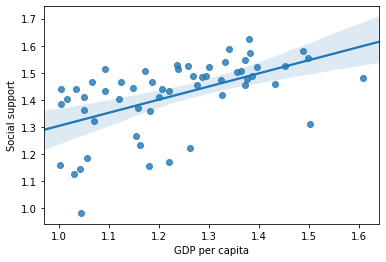

In [264]:
sns.regplot(x= 'GDP per capita' , y = 'Social support' , data = finaldata[finaldata['GDP per capita'] > 1])

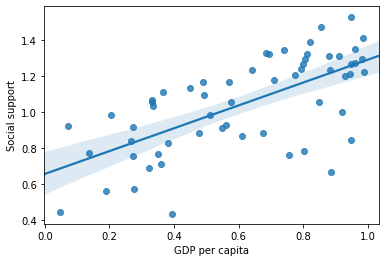

In [265]:
sns.regplot(x= 'GDP per capita' , y = 'Social support' , data = finaldata[finaldata['GDP per capita'] < 1])

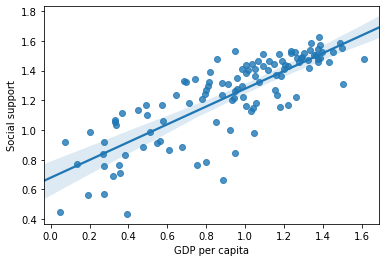

In [266]:
sns.regplot(x= 'GDP per capita' , y = 'Social support' , data = finaldata , ci = 99)

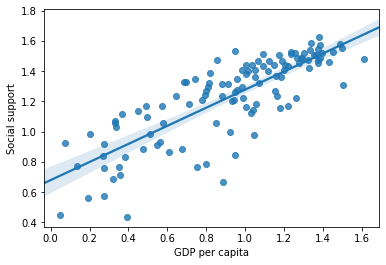

In [267]:
sns.regplot(x= 'GDP per capita' , y = 'Social support' , data = finaldata , ci = 95)